# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
import keras
print("Tensorflow version:", tf.__version__)

Tensorflow version: 1.12.0


Using TensorFlow backend.


# Understanding Frequency within Datatset

In [2]:
for expression in os.listdir("./datasets/fruits-360/Training/"):
    print(str(len(os.listdir("./datasets/fruits-360/Training/" + expression))) + " " + expression + " images")
print("")
for expression in os.listdir("./datasets/fruits-360/Test/"):
    print(str(len(os.listdir("./datasets/fruits-360/Test/" + expression))) + " " + expression + " images")

297 Ginger Root images
490 Lychee images
367 Tomato Maroon images
445 Onion Red Peeled images
450 Potato Sweet images
490 Guava images
490 Pear Monster images
450 Corn images
492 Cherry Wax Red images
453 Potato Red Washed images
492 Cherry Wax Black images
490 Lemon Meyer images
666 Pear Red images
490 Granadilla images
492 Apple Granny Smith images
492 Mulberry images
426 Mango Red images
450 Potato White images
672 Tomato 2 images
493 Pineapple Mini images
492 Rambutan images
480 Nectarine Flat images
480 Apple Golden 1 images
392 Cucumber Ripe images
984 Grape Blue images
447 Plum images
490 Pineapple images
420 Plum 2 images
450 Banana Lady Finger images
456 Apple Pink Lady images
738 Melon Piel de Sapo images
492 Apple Golden 2 images
490 Banana images
492 Apple Red 1 images
490 Grape White images
450 Chestnut images
666 Pepper Yellow images
492 Nectarine images
735 Walnut images
490 Pear Williams images
702 Pepper Orange images
490 Grapefruit Pink images
475 Watermelon images
45

# Data Generator Objects with Data Augmentation

In [8]:
img_size = 100
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True,
                                  rotation_range=20,
                                  width_shift_range=0.15,
                                  height_shift_range=0.15,
                                  rescale=1./255,
                                  shear_range=0.15,
                                  zoom_range=0.15)

train_generator = datagen_train.flow_from_directory("./datasets/fruits-360/Training/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_generator = datagen_validation.flow_from_directory("./datasets/fruits-360/Test/",
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

train_generator.class_indices

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

# Visualize Data

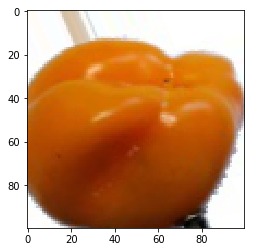

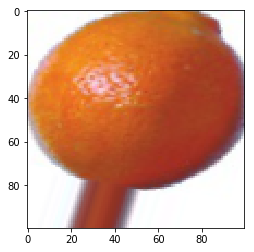

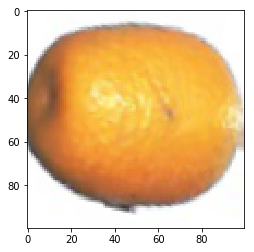

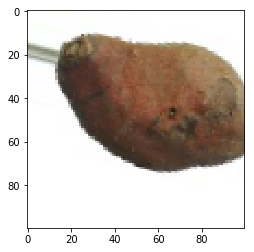

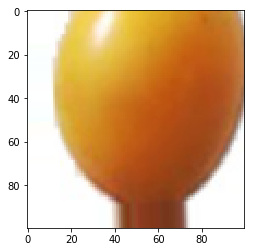

In [4]:
def view_images_datagenerator(batches):  
    x_batch, y_batch = next(batches)

    for i in range (5):
        image = x_batch[i]
        plt.imshow(image)
        plt.show()
view_images_datagenerator(train_generator)

# CNN Model

In [9]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th Convolution layer
model.add(Conv2D(1024,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(131, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_14 (Batc (None, 100, 100, 64)      256       
_________________________________________________________________
activation_14 (Activation)   (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)       204928    
_________________________________________________________________
batch_normalization_15 (Batc (None, 50, 50, 128)       512       
__________

# Training with Callbacks

In [11]:
epochs = 1
steps_per_epoch = train_generator.n//train_generator.batch_size
test_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("Model_Weights/fruits_360_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = test_steps,
    callbacks=callbacks
)

Epoch 1/1
1056/1057 [============================>.] - ETA: 0s - loss: 0.0316 - acc: 0.9916
Epoch 00001: saving model to Model_Weights/fruits_360_weights.h5
1057/1057 [==============================] - 251s 237ms/step - loss: 0.0317 - acc: 0.9916 - val_loss: 0.0428 - val_acc: 0.9873


In [12]:
model_json = model.to_json()
with open("fruits_360_model.json", "w") as json_file:
    json_file.write(model_json)